In [1]:
#NEWS PUBLISHING COMPANY PROJECT

In [2]:
#Importing the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import Imputer,StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import datetime
from sklearn import metrics
from sklearn.metrics import roc_auc_score,average_precision_score,accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
import xgboost
%matplotlib inline

C:\Users\Hardik\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Hardik\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
#Importing Data
data1= pd.read_csv('data/complaints.txt',sep=';',encoding='utf-8')
data2= pd.read_csv('data/credit.txt',sep=';',encoding='utf-8')
data3= pd.read_csv('data/customers.txt',sep=';',encoding='utf-8')
data4= pd.read_csv('data/delivery.txt',sep=';',encoding='utf-8')
data5= pd.read_csv('data/formula.txt',sep=';',encoding='utf-8')
data6= pd.read_csv('data/subscriptions.txt',delim_whitespace=True,encoding='utf-8')

In [4]:
data1.head()

,ComplaintID,CustomerID,ProductID,ComplaintDate,ComplaintType,SolutionType,FeedbackType
0,181932,3464,8.0,14/10/2010,7,2.0,NaN
1,168698,3464,8.0,19/07/2010,1,2.0,3.0
2,163694,4107,8.0,11/06/2010,1,2.0,3.0
3,111664,4870,8.0,25/04/2009,1,3.0,3.0
4,139482,4870,8.0,05/12/2009,1,3.0,3.0


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4125 entries, 0 to 4124
Data columns (total 7 columns):
ComplaintID      4125 non-null int64
CustomerID       4125 non-null int64
ProductID        3711 non-null float64
ComplaintDate    4125 non-null object
ComplaintType    4125 non-null int64
SolutionType     3033 non-null float64
FeedbackType     1623 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 225.7+ KB


In [6]:
data1.describe()

,ComplaintID,CustomerID,ProductID,ComplaintType,SolutionType,FeedbackType
count,4125.000000,4.125000e+03,3711.000000,4125.000000,3033.000000,1623.000000
mean,116667.705939,5.490283e+05,5.818647,2.332848,1.721728,3.350585
std,44447.131851,3.192640e+05,2.305329,2.748423,0.770314,1.110292
min,37653.000000,3.464000e+03,1.000000,1.000000,1.000000,1.000000
25%,80230.000000,2.304690e+05,4.000000,1.000000,1.000000,3.000000
50%,112595.000000,6.572770e+05,7.000000,1.000000,2.000000,3.000000
75%,153540.000000,7.781450e+05,8.000000,1.000000,2.000000,4.000000
max,202605.000000,1.167188e+06,8.000000,9.000000,4.000000,6.000000


In [7]:
data2.head()

,SubscriptionID,ActionType,ProcessingDate,CreditSource,Amount,NbrNewspapers
0,1002057,EN,18/05/2009,COM,1.0400,1.0
1,1002089,EN,06/10/2010,COM,0.8783,1.0
2,1002089,EN,22/12/2010,COM,0.8783,1.0
3,1002089,EN,23/12/2010,COM,0.8783,1.0
4,1002089,EN,24/12/2010,COM,0.8783,1.0


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1940 entries, 0 to 1939
Data columns (total 6 columns):
SubscriptionID    1940 non-null int64
ActionType        1940 non-null object
ProcessingDate    1902 non-null object
CreditSource      1940 non-null object
Amount            1937 non-null float64
NbrNewspapers     1408 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 91.0+ KB


In [9]:
data2.describe()

,SubscriptionID,Amount,NbrNewspapers
count,1.940000e+03,1937.000000,1408.000000
mean,4.860147e+05,6.297127,0.752841
std,3.188891e+05,24.909583,1.667872
min,5.933700e+04,0.000000,0.000000
25%,2.320825e+05,0.819100,0.000000
50%,4.131360e+05,1.000000,1.000000
75%,6.824305e+05,2.100000,1.000000
max,1.354916e+06,263.486700,40.000000


In [10]:
data3.head()

,CustomerID,Gender,DOB,District,ZIP,StreeID
0,908289,F,24/01/1957,5,3660,42555
1,55837,M,31/01/1948,1,2620,24910
2,493436,M,11/07/1977,5,3570,39586
3,913684,F,01/01/1900,5,3500,37484
4,36632,M,18/08/1952,5,3910,46296


In [11]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 6 columns):
CustomerID    2356 non-null int64
Gender        2257 non-null object
DOB           2356 non-null object
District      2356 non-null int64
ZIP           2356 non-null int64
StreeID       2356 non-null int64
dtypes: int64(4), object(2)
memory usage: 110.5+ KB


In [12]:
data3.describe()

,CustomerID,District,ZIP,StreeID
count,2.356000e+03,2356.000000,2356.000000,2356.000000
mean,5.349043e+05,3.455008,3432.750424,36592.521647
std,3.821129e+05,2.045992,1272.641443,17942.070858
min,3.407000e+03,1.000000,1070.000000,0.000000
25%,1.308502e+05,1.000000,2640.000000,25083.000000
50%,6.165090e+05,5.000000,3530.000000,38524.500000
75%,8.522835e+05,5.000000,3700.000000,43773.500000
max,1.167808e+06,8.000000,9800.000000,146620.000000


In [13]:
data4.head()

,SubscriptionID,DeliveryType,DeliveryClass,DeliveryContext,StartDate,EndDate
0,1000024,MD,NOR,NaN,18/01/2010,17/04/2010
1,1000082,MD,ABN,NaN,12/02/2010,13/02/2010
2,1000082,MD,NOR,NaN,15/01/2010,11/02/2010
3,1000082,MD,NOR,NaN,14/02/2010,12/03/2010
4,1000082,MD,ABN,NaN,14/01/2010,14/01/2010


In [14]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26494 entries, 0 to 26493
Data columns (total 6 columns):
SubscriptionID     26494 non-null int64
DeliveryType       26494 non-null object
DeliveryClass      23106 non-null object
DeliveryContext    11346 non-null object
StartDate          26494 non-null object
EndDate            26494 non-null object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [15]:
data4.describe()

,SubscriptionID
count,2.649400e+04
mean,6.709016e+05
std,3.549329e+05
min,5.382000e+04
25%,3.520410e+05
50%,6.888250e+05
75%,9.728482e+05
max,1.361402e+06


In [16]:
data5.head()

,FormulaID,FormulaCode,FormulaType,Duration
0,10011,2051,CAM,12
1,10013,2051,CAM,12
2,10014,2051,CAM,6
3,10017,3,CAM,3
4,10019,71,CAM,3


In [17]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 4 columns):
FormulaID      997 non-null int64
FormulaCode    997 non-null int64
FormulaType    997 non-null object
Duration       997 non-null int64
dtypes: int64(3), object(1)
memory usage: 31.2+ KB


In [18]:
data5.describe()

,FormulaID,FormulaCode,Duration
count,997.000000,997.000000,997.000000
mean,6704.903711,973.668004,5.764293
std,4544.819045,1514.764332,4.046865
min,23.000000,1.000000,0.000000
25%,2551.000000,8.000000,3.000000
50%,6004.000000,82.000000,3.000000
75%,9585.000000,2046.000000,12.000000
max,17444.000000,9000.000000,24.000000


In [19]:
data6.head()

,SubscriptionID,CustomerID,ProductID,Pattern,StartDate,EndDate,NbrNewspapers,NbrStart,RenewalDate,PaymentType,...,PaymentDate,FormulaID,GrossFormulaPrice,NetFormulaPrice,NetNewspaperPrice,ProductDiscount,FormulaDiscount,TotalDiscount,TotalPrice,TotalCredit
1000024,1150045,8.0,1111110.0,=VLOOKUP(D2;$E$15462:$F$15473;2;0),18/01/2010,17/04/2010,76,25,17/03/2010,BT,...,27/01/2010,8552,79,79,1.039.474,0,0,0,79,0.0
1000082,1150046,8.0,1111110.0,14/01/2010,12/03/2010,50,25,3/03/2010,BT,Paid,...,10017,519.737,29.6,0.592,0,223.737,223.737,29.6,0,NaN
100012,89085,8.0,1111110.0,1/01/2008,30/12/2008,304,10,21/11/2008,BT,Paid,...,875,249,249,0.811842,0,0,0,246.8,-2.2,NaN
100013,89085,8.0,1111110.0,2/01/2007,31/12/2007,304,25,1/12/2007,BT,Paid,...,874,235,235,0.773026,0,0,0,235,0,NaN
100016,89087,8.0,1111110.0,1/01/2008,30/12/2008,304,10,21/11/2008,BT,Paid,...,875,249,249,0.811842,0,0,0,246.8,-2.2,NaN


In [20]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15471 entries, 1000024 to 100
Data columns (total 21 columns):
SubscriptionID       15471 non-null int64
CustomerID           15459 non-null float64
ProductID            15459 non-null float64
Pattern              15459 non-null object
StartDate            15459 non-null object
EndDate              15459 non-null object
NbrNewspapers        15459 non-null object
NbrStart             15459 non-null object
RenewalDate          15459 non-null object
PaymentType          15459 non-null object
PaymentStatus        15453 non-null object
PaymentDate          15138 non-null object
FormulaID            15138 non-null object
GrossFormulaPrice    15138 non-null object
NetFormulaPrice      15138 non-null object
NetNewspaperPrice    15138 non-null object
ProductDiscount      15138 non-null object
FormulaDiscount      15138 non-null object
TotalDiscount        15138 non-null object
TotalPrice           10595 non-null object
TotalCredit          1 non

In [21]:
data6.describe()

,SubscriptionID,CustomerID,ProductID,TotalCredit
count,1.547100e+04,15459.000000,1.545900e+04,1.0
mean,4.890274e+05,6.209522,1.082186e+06,0.0
std,3.463220e+05,2.394066,1.757144e+05,NaN
min,1.000000e+00,1.000000,1.000000e+01,0.0
25%,1.276830e+05,4.000000,1.111110e+06,0.0
50%,5.051710e+05,8.000000,1.111110e+06,0.0
75%,7.713630e+05,8.000000,1.111110e+06,0.0
max,1.167808e+06,8.000000,1.111110e+06,0.0


In [22]:
#Exploring different data sets with visualizations

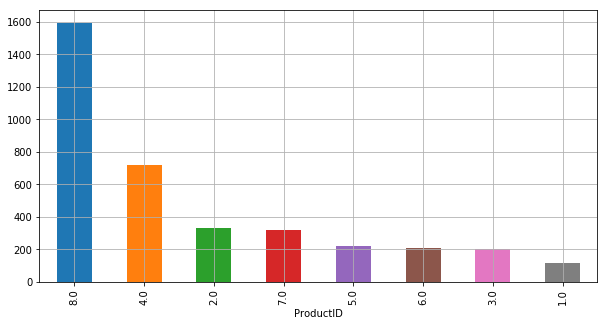

In [23]:
plt.figure(figsize=(10,5))
data1.groupby("ProductID").ComplaintID.count().sort_values(ascending=False).plot.bar()
plt.grid()
plt.show()

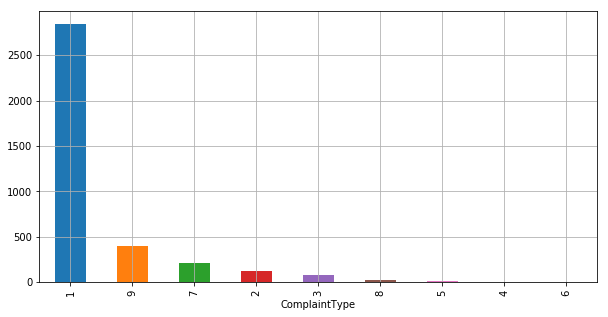

In [24]:
plt.figure(figsize=(10,5))
data1.groupby("ComplaintType").ProductID.count().sort_values(ascending=False).plot.bar()
plt.grid()
plt.show()

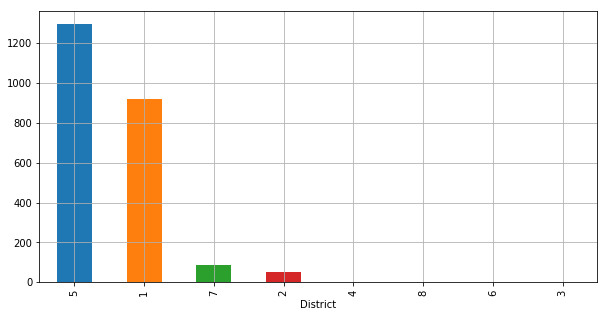

In [25]:
plt.figure(figsize=(10,5))
data3.groupby("District").CustomerID.count().sort_values(ascending=False).plot.bar()
plt.grid()
plt.show()

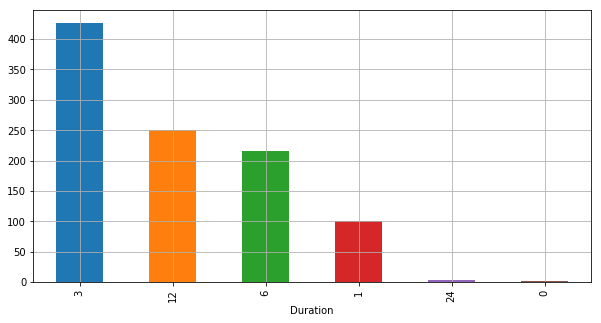

In [26]:
plt.figure(figsize=(10,5))
data5.groupby("Duration").FormulaID.count().sort_values(ascending=False).plot.bar()
plt.grid()
plt.show()

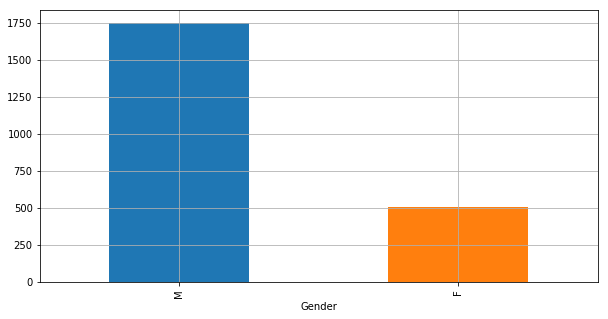

In [27]:
plt.figure(figsize=(10,5))
data3.groupby("Gender").CustomerID.count().sort_values(ascending=False).plot.bar()
plt.grid()
plt.show()

In [28]:
#Exploring data6 and preparing it as base table

In [29]:
cols=data6.columns
cols

Index(['SubscriptionID', 'CustomerID', 'ProductID', 'Pattern', 'StartDate',
       'EndDate', 'NbrNewspapers', 'NbrStart', 'RenewalDate', 'PaymentType',
       'PaymentStatus', 'PaymentDate', 'FormulaID', 'GrossFormulaPrice',
       'NetFormulaPrice', 'NetNewspaperPrice', 'ProductDiscount',
       'FormulaDiscount', 'TotalDiscount', 'TotalPrice', 'TotalCredit'],
      dtype='object')

In [30]:
data6=data6.drop('TotalCredit',axis=1)
data6.reset_index(inplace=True)
data6.columns=cols
cols

Index(['SubscriptionID', 'CustomerID', 'ProductID', 'Pattern', 'StartDate',
       'EndDate', 'NbrNewspapers', 'NbrStart', 'RenewalDate', 'PaymentType',
       'PaymentStatus', 'PaymentDate', 'FormulaID', 'GrossFormulaPrice',
       'NetFormulaPrice', 'NetNewspaperPrice', 'ProductDiscount',
       'FormulaDiscount', 'TotalDiscount', 'TotalPrice', 'TotalCredit'],
      dtype='object')

In [31]:
for i in range(4,len(data6.columns)-1):
    data6.iloc[0,i]=data6.iloc[0,i+1]

In [32]:
for i in range(len(data6)):
    if (data6.iloc[i,7]=='BT'):
        for j in range(len(data6.columns)-3,6,-1):
            data6.iloc[i,j+2]=data6.iloc[i,j]
        data6.iloc[i,7]=np.nan
        data6.iloc[i,8]=np.nan
    
    if (data6.iloc[i,8]=='BT' or data6.iloc[i,8]=='DD'):
        for j in range(len(data6.columns)-2,7,-1):
            data6.iloc[i,j+1]=data6.iloc[i,j]
        data6.iloc[i,8]=np.nan
    
    if (data6.iloc[i,10]=='Not'):
        data6.iloc[i,10]='Not Paid'
        data6.iloc[i,11]=np.nan
    
    x=str(data6.iloc[i,7])
    
    if (x.rfind('/')!=-1):
        data6.iloc[i,8]=data6.iloc[i,7]
        data6.iloc[i,7]=np.nan
    
    x=str(data6.iloc[i,12])
    
    if (x.rfind('/')!=-1):
        data6.iloc[i,12]='99999999'
    
    if(type(data6.loc[i,'NetNewspaperPrice'])!=float):
        x=str(data6.loc[i,'NetNewspaperPrice'])
        if((data6.loc[i,'NetNewspaperPrice'].count('.')>1)|(x.rfind('-')!=-1)):
            data6.loc[i,'NetNewspaperPrice']=np.nan
    
    if(type(data6.loc[i,'FormulaDiscount'])!=float):
        if(data6.loc[i,'FormulaDiscount'].count('.')>1):
            data6.loc[i,'FormulaDiscount']=np.nan
    
    if(type(data6.loc[i,'TotalDiscount'])!=float):
        if(data6.loc[i,'TotalDiscount'].count('.')>1):
            data6.loc[i,'TotalDiscount']=np.nan
    
    if(type(data6.loc[i,'ProductDiscount'])!=float):
        if(data6.loc[i,'ProductDiscount'].count('.')>1):
            data6.loc[i,'ProductDiscount']=np.nan
    
    if(type(data6.loc[i,'TotalCredit'])!=float):
        if(data6.loc[i,'TotalCredit'].count('.')>1):
            data6.loc[i,'TotalCredit']=np.nan

In [33]:
x=['NetNewspaperPrice','FormulaDiscount','TotalDiscount','ProductDiscount','TotalCredit']

In [34]:
for i in x:
    data6[i]=data6[i].astype(float)

In [35]:
data6=data6.drop(data6.index[15459:15471])

In [36]:
data6.FormulaID=data6.FormulaID.astype(int)

In [37]:
data6.RenewalDate=np.where(data6.RenewalDate.isna()==True,'01/01/2099',data6.RenewalDate)
data6.PaymentDate=np.where(data6.PaymentDate.isna()==True,'01/01/2099',data6.PaymentDate)

In [38]:
x=['StartDate','EndDate','RenewalDate','PaymentDate']

In [39]:
for i in x:
    data6[i]=pd.to_datetime(data6[i],format='%d/%m/%Y')

In [40]:
data4.StartDate=pd.to_datetime(data4.StartDate,format='%d/%m/%Y')        
data4.EndDate=pd.to_datetime(data4.EndDate,format='%d/%m/%Y')    
data3.DOB=pd.to_datetime(data3.DOB,format='%d/%m/%Y')

In [41]:
#Defining base table as "data"

In [42]:
data=pd.merge(data6,data5,how='left',on='FormulaID')
data=pd.merge(data4,data,how='left',on='SubscriptionID')
data=pd.merge(data,data3,how='left',on='CustomerID')
data=pd.merge(data,data2,how='left',on='SubscriptionID')
data=pd.merge(data,data1,how='left',on=['CustomerID','ProductID'])

In [43]:
#Removing columns with high correlation
data=data.drop(['FeedbackType','SolutionType','ComplaintDate','ComplaintID','ComplaintType','TotalPrice','NbrNewspapers_y','NbrStart','Amount','CreditSource','ProcessingDate','GrossFormulaPrice','ActionType','Duration','FormulaType','FormulaCode','DeliveryContext','NetFormulaPrice'],axis=1)

In [44]:
data.NbrNewspapers_x=data.NbrNewspapers_x.astype(int)

In [45]:
#Defining Churn in reference to Renewal Date, Start Date and End Date
data['Churn']=np.where((data.RenewalDate > data.StartDate_y) & (data.RenewalDate < data.EndDate_y),0,1)

In [46]:
#Defining Quantiles for treating outliers later

In [47]:
desc=data.describe().T
desc['1%']=data.quantile(.01)
desc['5%']=data.quantile(.05)
desc['95%']=data.quantile(.95)
desc['99%']=data.quantile(.99)
desc['Q3-Q1']=desc['75%']-desc['25%']
desc['UB']=desc['75%']+(desc['Q3-Q1']*1.5)
desc['LB']=desc['25%']-(desc['Q3-Q1']*1.5)
desc=desc.loc[:,['count','mean','std','min','max','1%','5%','25%','50%','75%','95%','99%','Q3-Q1','LB','UB']]
desc

,count,mean,std,min,max,1%,5%,25%,50%,75%,95%,99%,Q3-Q1,LB,UB
SubscriptionID,62344.0,6.364140e+05,3.486594e+05,53820.000,1.361402e+06,68477.43,135641.15,3.286830e+05,6.010370e+05,9.205265e+05,1224895.00,1337725.55,5.918435e+05,-5.590822e+05,1.808292e+06
CustomerID,62344.0,5.126550e+05,3.277738e+05,3407.000,1.167808e+06,7182.00,44026.00,1.691560e+05,6.486740e+05,7.804760e+05,980298.00,1142892.00,6.113200e+05,-7.478240e+05,1.697456e+06
ProductID,62344.0,6.018975e+00,2.301290e+00,1.000,8.000000e+00,1.00,2.00,4.000000e+00,7.000000e+00,8.000000e+00,8.00,8.00,4.000000e+00,-2.000000e+00,1.400000e+01
Pattern,62344.0,1.085896e+06,1.631701e+05,10.000,1.111110e+06,10.00,1111110.00,1.111110e+06,1.111110e+06,1.111110e+06,1111110.00,1111110.00,0.000000e+00,1.111110e+06,1.111110e+06
NbrNewspapers_x,62344.0,2.094454e+02,1.189960e+02,2.000,6.080000e+02,12.00,25.00,7.600000e+01,3.040000e+02,3.040000e+02,306.00,329.00,2.280000e+02,-2.660000e+02,6.460000e+02
FormulaID,62344.0,2.531198e+07,4.347748e+07,23.000,1.000000e+08,290.00,869.00,8.950000e+02,4.242000e+03,1.000000e+08,99999999.00,99999999.00,9.999910e+07,-1.499978e+08,2.499987e+08
NetNewspaperPrice,56330.0,8.104224e-01,1.736459e-01,0.000,1.120000e+00,0.00,0.56,7.557760e-01,8.190790e-01,8.831170e-01,1.04,1.10,1.273410e-01,5.647645e-01,1.074129e+00
ProductDiscount,62301.0,9.811619e-01,1.548281e+01,0.000,2.760000e+02,0.00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.00,0.000000e+00,0.000000e+00,0.000000e+00
FormulaDiscount,59440.0,3.874906e+00,2.008498e+01,0.000,4.394740e+02,0.00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,20.48,116.55,0.000000e+00,0.000000e+00,0.000000e+00
TotalDiscount,59397.0,4.906844e+00,2.543805e+01,0.000,4.394740e+02,0.00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,20.48,129.00,0.000000e+00,0.000000e+00,0.000000e+00


In [48]:
#Creating dummy variables and handling missing values

In [49]:
cols=pd.get_dummies(data['DeliveryClass'],prefix='DeliveryClass')
data=pd.concat([data,cols],axis=1)
data=data.drop('DeliveryClass',axis=1)

In [50]:
data=data.dropna()
data.reset_index(drop=True,inplace=True)

In [51]:
data.NetNewspaperPrice=data.NetNewspaperPrice.fillna(data.NetNewspaperPrice.median())

In [52]:
data.TotalDiscount=data.TotalDiscount.fillna(data.TotalDiscount.mode())

In [53]:
data.FormulaDiscount=data.FormulaDiscount.fillna(data.FormulaDiscount.mode())

In [54]:
#Handling Outliers

In [55]:
data['NbrNewspapers_x']=np.clip(data['NbrNewspapers_x'],desc.loc['NbrNewspapers_x','1%'],desc.loc['NbrNewspapers_x','99%'])
data['NetNewspaperPrice']=np.clip(data['NetNewspaperPrice'],desc.loc['NetNewspaperPrice','1%'],desc.loc['NetNewspaperPrice','99%'])
data['TotalCredit']=data['TotalCredit'].clip_lower(desc.loc['TotalCredit','1%'])

In [56]:
lecr=LabelEncoder()
data['Gender']=lecr.fit_transform(data['Gender'])
data['PaymentStatus']=lecr.fit_transform(data['PaymentStatus'])
data['PaymentType']=lecr.fit_transform(data['PaymentType'])

In [57]:
cols=pd.get_dummies(data['District'],prefix='District')
cols=cols.drop(cols.columns[0],axis=1)

In [58]:
data=pd.concat([data,cols],axis=1)
data=data.drop('District',axis=1)

In [59]:
cols=pd.get_dummies(data['DeliveryType'],prefix='DeliveryType')
cols=cols.drop(cols.columns[0],axis=1)

In [60]:
data=pd.concat([data,cols],axis=1)
data=data.drop('DeliveryType',axis=1)

In [61]:
data=data.drop_duplicates()
data=data.reset_index(drop=True)

In [62]:
for i in range(len(data)):
    data.loc[i,'DOB']=pd.datetime.toordinal(data.loc[i,'DOB'])
    data.loc[i,'RenewalDate']=pd.datetime.toordinal(data.loc[i,'RenewalDate'])
    data.loc[i,'PaymentDate']=pd.datetime.toordinal((data.loc[i,'PaymentDate']))
    data.loc[i,'StartDate_x']=pd.datetime.toordinal((data.loc[i,'StartDate_x']))
    data.loc[i,'EndDate_x']=pd.datetime.toordinal((data.loc[i,'EndDate_x']))
    data.loc[i,'StartDate_y']=pd.datetime.toordinal((data.loc[i,'StartDate_y']))
    data.loc[i,'EndDate_y']=pd.datetime.toordinal((data.loc[i,'EndDate_y']))

In [63]:
y=data['Churn']
data.drop('Churn',axis=1,inplace=True)
data.index=data.CustomerID
data.update(data.drop(columns=["CustomerID"]))
data.update(data.drop(columns=["SubscriptionID"]))

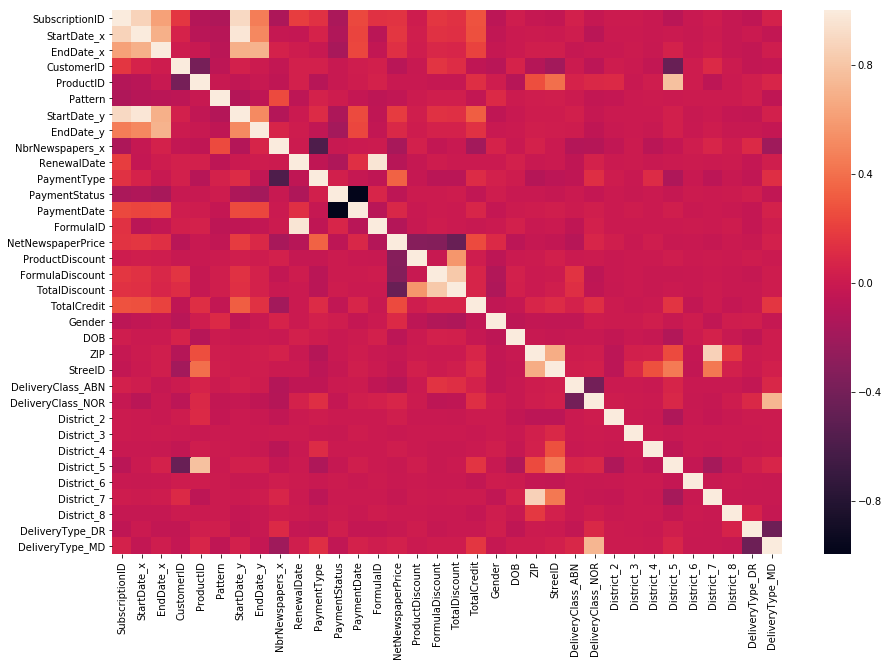

In [64]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr())
plt.show()

In [65]:
data.drop_duplicates()

,SubscriptionID,StartDate_x,EndDate_x,CustomerID,ProductID,Pattern,StartDate_y,EndDate_y,NbrNewspapers_x,RenewalDate,...,DeliveryClass_NOR,District_2,District_3,District_4,District_5,District_6,District_7,District_8,DeliveryType_DR,DeliveryType_MD
CustomerID,,,,,,,,,,,,,,,,,,,,,
1150046,1000082,733815,733816,1150046,8.0,1111110.0,733786,733843,50.0,733834,...,0,0,0,0,1,0,0,0,0,1
1150046,1000082,733787,733814,1150046,8.0,1111110.0,733786,733843,50.0,733834,...,1,0,0,0,1,0,0,0,0,1
1150046,1000082,733817,733843,1150046,8.0,1111110.0,733786,733843,50.0,733834,...,1,0,0,0,1,0,0,0,0,1
1150046,1000082,733786,733786,1150046,8.0,1111110.0,733786,733843,50.0,733834,...,0,0,0,0,1,0,0,0,0,1
89085,100012,733042,733406,89085,8.0,1111110.0,733042,733406,304.0,733367,...,1,0,0,0,1,0,0,0,0,1
89085,100013,732678,733041,89085,8.0,1111110.0,732678,733041,304.0,733011,...,1,0,0,0,1,0,0,0,0,1
89087,100016,733042,733242,89087,8.0,1111110.0,733042,733406,304.0,733367,...,1,0,0,0,1,0,0,0,0,1
89087,100016,733251,733406,89087,8.0,1111110.0,733042,733406,304.0,733367,...,1,0,0,0,1,0,0,0,0,1
89087,100016,733243,733250,89087,8.0,1111110.0,733042,733406,304.0,733367,...,1,0,0,0,1,0,0,0,1,0


In [66]:
#Modeling

In [67]:
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.2,random_state=0)

In [68]:
names=[
    "Nearest Neighbors", 
    "Decision Tree",
    "Random Forest", 
    "AdaBoost",
    "Neural Net",
    "Naive Bayes", 
    "Linear Discriminant Analysis",
    "Quadratic Discriminant Analysis",
    "Logistic Regression",
    "XGBoost"
    ]

classifiers=[
    KNeighborsClassifier(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=500),
    AdaBoostClassifier(),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    xgboost.XGBClassifier()
    ]

In [69]:
for i,j in zip(names,classifiers):
    j.fit(x_train,y_train)
    
    score = j.score(x_test,y_test)
    ypred=j.predict(x_test)    
    cv_acc=cross_val_score(estimator=j,X=x_train,y=y_train,cv=5)
    cm=confusion_matrix(y_test,ypred)
    cv_acc=cv_acc.mean()
    acc=accuracy_score(y_test,ypred)
    f1=f1_score(y_test,ypred,average='binary')
    auc = roc_auc_score(y_test,ypred)
    aps=average_precision_score(y_test,ypred)   
    
    print("+"*103)
    print("\n Classifier is \n" + str(i))
    print("\n Score \n" + str(score*100) + "%")
    print('\n Confusion Matrix \n',cm)
    print('\n Cross Validation Score \n',cv_acc)
    print('\n Testing Accuracy \n',acc)
    print('\n F1 Score \n',f1)
    print('\n AUC \n',auc)
    print('\n Average Precision Score \n',aps)
    print("\n",j.get_params,"\n")
    
    if i=="XGBoost":
        feature_importances=pd.DataFrame(j.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
        print(feature_importances)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 Classifier is 
Nearest Neighbors

 Score 
97.09006928406467%

 Confusion Matrix 
 [[2993   29]
 [  97 1211]]

 Cross Validation Score 
 0.9655870972517787

 Testing Accuracy 
 0.9709006928406466

 F1 Score 
 0.9505494505494505

 AUC 
 0.9581223423740682

 Average Precision Score 
 0.9265900936044549

 <bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')> 

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 Classifier is 
Decision Tree

 Score 
97.52886836027713%

 Confusion Matrix 
 [[3004   18]
 [  89 1219]]

 Cross Validation Score 
 0.9758070136360695

 Testing Accuracy 
 0.9752886836027713

 F1 Score 
 0.9579567779960707

 AUC 
 0.9630004331133358

 Average Precision Score 

C:\Users\Hardik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Hardik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Hardik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Hardik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Hardik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Hardik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 Classifier is 
Linear Discriminant Analysis

 Score 
97.09006928406467%

 Confusion Matrix 
 [[3020    2]
 [ 124 1184]]

 Cross Validation Score 
 0.9713611527737299

 Testing Accuracy 
 0.9709006928406466

 F1 Score 
 0.9494787489975942

 AUC 
 0.9522684816948899

 Average Precision Score 
 0.9323097166680703

 <bound method BaseEstimator.get_params of LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)> 



C:\Users\Hardik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Hardik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Hardik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Hardik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Hardik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Hardik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Hardik\Anaconda3\li

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 Classifier is 
Quadratic Discriminant Analysis

 Score 
96.46651270207852%

 Confusion Matrix 
 [[2952   70]
 [  83 1225]]

 Cross Validation Score 
 0.9636240987703062

 Testing Accuracy 
 0.9646651270207852

 F1 Score 
 0.9412216673069536

 AUC 
 0.9566904373027969

 Average Precision Score 
 0.905088915217737

 <bound method BaseEstimator.get_params of QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)> 

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 Classifier is 
Logistic Regression

 Score 
96.85912240184757%

 Confusion Matrix 
 [[3012   10]
 [ 126 1182]]

 Cross Validation Score 
 0.9696289011049839

 Testing Accuracy 
 0.9685912240184757

 F1 Score 
 0.9456000000000001

 AUC 
 0.9501803289637459

 Average Precision Score 
 0.92518791

C:\Users\Hardik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Hardik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Hardik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Hardik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 Classifier is 
XGBoost

 Score 
97.9445727482679%

 Confusion Matrix 
 [[3010   12]
 [  77 1231]]

 Cross Validation Score 
 0.9786364297199228

 Testing Accuracy 
 0.979445727482679

 F1 Score 
 0.9651117208937672

 AUC 
 0.9685803091295838

 Average Precision Score 
 0.9498286658580989

 <bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)> 

                   importance
RenewalDate          0.196850
FormulaID            0.114173
NbrNewspapers_x      0.098425
EndDate_y            0.092520
NetNewspaperPrice    0.08

C:\Users\Hardik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [70]:
#As observed, here XGBoost yields best accuracy. Accordingly, we have the corresponding feature importances above.
#According to the mentioned importance, we can reduce the number of features to make the model better. Here, we remove features that have no or very little impact with regard to the model.

In [71]:
data=data[["RenewalDate","FormulaID","EndDate_y","NetNewspaperPrice","PaymentDate"]]

In [72]:
#Re-Modeling
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.2,random_state=0)

In [73]:
model=xgboost.XGBClassifier()
model.fit(x_train,y_train)
score = model.score(x_test,y_test)
feature_importances=pd.DataFrame(model.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
print("\n Score \n" + str(score*100) + "%")
print(feature_importances)


 Score 
98.08314087759815%
                   importance
RenewalDate          0.247525
FormulaID            0.243564
EndDate_y            0.190099
PaymentDate          0.172277
NetNewspaperPrice    0.146535


C:\Users\Hardik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [74]:
#Apart from features highlighted above, we also observe that:
#1. Complaints for Product with ID 8 are maximum.
#2. Complaint Type 1 are maximum.
#3. Maximum customers are from District 5, followed by District 1.
#4. There are more Male customers.